# NLO Finite top samples

**Goal:** Right now, pairAGraph is doing a lovely job at pairing, and identifying the signal, but it's also pushing the background to higher $m_{hh}$.

I wanted to *try out* some options for training on different physics samples,

In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations
from tqdm import tqdm
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import gridspec

import json
import time
import h5py
import uproot
import torch

from trainNet import pairAGraph
from preprocess import truthInfo, parallelTruthMatchJets, parallelGetCorrectPair
from preprocess import processDf, scale, applyCuts

import os
os.sys.path.append('../code')
from analysis import fileDir, normalizeWeight
from AnalysisUtils import nanoToDf
from eventDisplays import truthDisplay

%load_ext autoreload
%autoreload 2

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


**SM reprocessing**

In [2]:
prodTag = 'APR2020'
nSelectedJets = 5

In [3]:
sm_dfs = {}

for mc in ['mc16a','mc16d','mc16e']:
        
    # Get the MNT name
    wildcard_filename = fileDir[f'SMNR_{mc}_PFlow-{prodTag}']+'*.root'
    
    dfs = []
    for filename in glob(wildcard_filename):
        
        # Process the df
        dfi = processDf(filename,nJetsMax=nSelectedJets,pT_min=40)
        dfs.append(dfi)
    
    # Save the files from a single mc campaign
    df = pd.concat(dfs)
    sm_dfs[mc] = df
    
    for ntag in [4,3,2,1,0]:
        outputDir = f'../data/SMNR_{mc}_PFlow-{prodTag}-{nSelectedJets}jets'
        if not os.path.exists(outputDir):
            os.mkdir(outputDir)
            
        df[(df.njets>=4) & (df.ntag>=ntag)].to_hdf(f'{outputDir}/df_{ntag}b.h5',key='df')
    


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resol

  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 1 selected jets out of 9 resolved jets
  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 resolved jets
  Jet sfs for evts with 7 selected jets out of 9 resolved jets
  Jet sfs for evts with 8 selected jets out of 9 resolved jets
  Jet sfs for evts with 9 selected jets out of 9 resolved jets

  Jet sfs for evts with 1 selected jets out of 10 resolved jets
  Jet sfs for evts with 2 selected jets out of 10 resolved jets
  Jet sfs for evts with 3 selected jets out of 10 resolved jets
  Jet sfs for evts with 4 selected jets out of 10 resolved jets
  Jet sfs for evts with 5 selected jets out of 10 resolved jets
  Jet sfs for evts with 6 selected jets out of 1

b-quark kinematics
Saving info to the dfs
Calculating the truth m_hh
njets =  4
njets =  5

Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16e-2018.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562917._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selec


  Jet sfs for evts with 2 selected jets out of 18 resolved jets
  Jet sfs for evts with 3 selected jets out of 18 resolved jets
  Jet sfs for evts with 4 selected jets out of 18 resolved jets
  Jet sfs for evts with 5 selected jets out of 18 resolved jets
  Jet sfs for evts with 6 selected jets out of 18 resolved jets
  Jet sfs for evts with 7 selected jets out of 18 resolved jets

  Jet sfs for evts with 2 selected jets out of 19 resolved jets
  Jet sfs for evts with 3 selected jets out of 19 resolved jets
  Jet sfs for evts with 4 selected jets out of 19 resolved jets
  Jet sfs for evts with 5 selected jets out of 19 resolved jets
  Jet sfs for evts with 6 selected jets out of 19 resolved jets
  Jet sfs for evts with 7 selected jets out of 19 resolved jets
  Jet sfs for evts with 8 selected jets out of 19 resolved jets

  Jet sfs for evts with 1 selected jets out of 20 resolved jets
  Jet sfs for evts with 2 selected jets out of 20 resolved jets
  Jet sfs for evts with 3 selected je

  Jet sfs for evts with 3 selected jets out of 12 resolved jets
  Jet sfs for evts with 4 selected jets out of 12 resolved jets
  Jet sfs for evts with 5 selected jets out of 12 resolved jets
  Jet sfs for evts with 6 selected jets out of 12 resolved jets
  Jet sfs for evts with 7 selected jets out of 12 resolved jets
  Jet sfs for evts with 8 selected jets out of 12 resolved jets
  Jet sfs for evts with 9 selected jets out of 12 resolved jets
  Jet sfs for evts with 10 selected jets out of 12 resolved jets
  Jet sfs for evts with 11 selected jets out of 12 resolved jets

  Jet sfs for evts with 1 selected jets out of 13 resolved jets
  Jet sfs for evts with 3 selected jets out of 13 resolved jets
  Jet sfs for evts with 4 selected jets out of 13 resolved jets
  Jet sfs for evts with 5 selected jets out of 13 resolved jets
  Jet sfs for evts with 6 selected jets out of 13 resolved jets
  Jet sfs for evts with 7 selected jets out of 13 resolved jets
  Jet sfs for evts with 8 selected je

**$\kappa_\lambda$ reprocessing**

In [4]:
k10_dfs = {}

for mc in ['mc16a','mc16d']:
        
    # Get the MNT name
    wildcard_filename = fileDir[f'k10_{mc}_PFlow-{prodTag}']+'*.root'
    
    dfs = []
    for filename in glob(wildcard_filename):
        
        # Process the df
        dfi = processDf(filename,nJetsMax=nSelectedJets,pT_min=40)
        dfs.append(dfi)
    
    # Save the files from a single mc campaign
    df = pd.concat(dfs)
    k10_dfs[mc] = df
    
    for ntag in [4,3,2,1,0]:
        outputDir = f'../data/k10_{mc}_PFlow-{prodTag}-{nSelectedJets}jets'
        if not os.path.exists(outputDir):
            os.mkdir(outputDir)
            
        df[(df.njets>=4) & (df.ntag>=ntag)].to_hdf(f'{outputDir}/df_{ntag}b.h5',key='df')
    


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600044.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562920._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resol

  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 resolved jets
  Jet sfs for evts with 7 selected jets out of 9 resolved jets
  Jet sfs for evts with 8 selected jets out of 9 resolved jets
  Jet sfs for evts with 9 selected jets out of 9 resolved jets

  Jet sfs for evts with 1 selected jets out of 10 resolved jets
  Jet sfs for evts with 2 selected jets out of 10 resolved jets
  Jet sfs for evts with 3 selected jets out of 10 resolved jets
  Jet sfs for evts with 4 selected jets out of 10 resolved jets
  Jet sfs for evts with 5 selected jets out of 10 resolved jets
  Jet sfs for evts with 6 selected jets out of 10 resolved jets
  Jet sfs for evts with 7 selected jets out of 10 resolved jets
  Jet sfs for evts with 8 selected jets out of 10 resolved jets
  Jet sfs for evts with 9 selected jets out of 10 resolved jets
  Jet sfs for evts with 10 selected jets out 

**Meanwhile, should I process the scalars as well?**

Full sim, or fast sim?

Maybe I should just do fast sim to be consistent w/ what Beojan was doing?


In [5]:
fileDir.keys()

dict_keys(['SMNR_mc16a_PFlow-FEB2019', 'SMNR_mc16a_Topo-FEB2019', 'SMNR_mc16a_PFlow-MAR2019', 'SMNR_mc16a_PFlow-MAY2019', 'SMNR_mc16a_PFlow-AUG2019', 'SMNR_mc16d_PFlow-AUG2019', 'SMNR_mc16e_PFlow-AUG2019', 'SMNR_mc16a_PFlow-MAR2020', 'SMNR_mc16d_PFlow-MAR2020', 'SMNR_mc16e_PFlow-MAR2020', 'data_15_Topo-FEB2019', 'data_15_PFlow-FEB2019', 'data_15_PFlow-MAY2019', 'data_16_Topo-FEB2019', 'data_16_PFlow-MAR2019', 'data_16_PFlow-MAY2019', 'graviton300_mc16a_Topo-APR2019', 'scalar300_mc16a_PFlow-AUG2019', 'SMNR_mc16a_PFlow-APR2020', 'SMNR_mc16d_PFlow-APR2020', 'SMNR_mc16e_PFlow-APR2020', 'k10_mc16a_PFlow-APR2020', 'k10_mc16d_PFlow-APR2020', 'scalar251_mc16a_PFlow-MAR2020', 'scalar260_mc16a_PFlow-MAR2020', 'scalar280_mc16a_PFlow-MAR2020', 'scalar300_mc16a_PFlow-MAR2020', 'scalar350_mc16a_PFlow-MAR2020', 'scalar400_mc16a_PFlow-MAR2020', 'scalar500_mc16a_PFlow-MAR2020', 'scalar600_mc16a_PFlow-MAR2020', 'scalar700_mc16a_PFlow-MAR2020', 'scalar800_mc16a_PFlow-MAR2020', 'scalar900_mc16a_PFlow-MAR2

In [6]:
for mc in ['mc16a','mc16d','mc16e']:

    for X in [251,260,280,300,350,400,500,600,700,800,900]:
    
        files = glob(fileDir[f'scalar{X}_{mc}_PFlow-MAR2020']+'*.root')
        dfs = [processDf(filename,nJetsMax=nSelectedJets,pT_min=40) for filename in files]
        df = pd.concat(dfs)

        # Save the files from a single mc campaign
        for ntag in [4,3,2,1,0]:
            outputDir = f'../data/SMNR_{mc}_PFlow-{prodTag}-{nSelectedJets}jets'
            if not os.path.exists(outputDir):
                os.mkdir(outputDir)

            df[(df.njets>=4) & (df.ntag>=ntag)].to_hdf(f'{outputDir}/df_{ntag}b.h5',key='df')
    


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/scalars_af2/user.bstanisl.HH4B.450248.scalar_af2.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.bstanisl.20735701._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 re

  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets

  Jet sfs for evts with 1 selected jets out of 7 resolved jets
  Jet sfs for evts with 2 selected jets out of 7 resolved jets
  Jet sfs for evts with 3 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 reso

  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 1 selected jets out of 9 resolved jets
  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 reso

  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 reso

  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 1 selected jets out of 9 resolved jets
  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 resolved jets
  Jet sfs for evts with 7 selected jets out of 9 reso

  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets

  Jet sfs for evts with 1 selected jets out of 7 resolved jets
  Jet sfs for evts with 2 selected jets out of 7 resolved jets
  Jet sfs for evts with 3 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 reso


  Jet sfs for evts with 4 selected jets out of 19 resolved jets
  Jet sfs for evts with 5 selected jets out of 19 resolved jets
Applying 2016 triggers
Retriving truth id
Getting the b-quark parent's barcodes
b-quark kinematics
Saving info to the dfs
Calculating the truth m_hh
njets =  4
njets =  5

Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/scalars_af2/user.bstanisl.HH4B.450249.scalar_af2.MC16d-2017.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.bstanisl.20735703._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs

  Jet sfs for evts with 7 selected jets out of 10 resolved jets
  Jet sfs for evts with 8 selected jets out of 10 resolved jets

  Jet sfs for evts with 1 selected jets out of 11 resolved jets
  Jet sfs for evts with 2 selected jets out of 11 resolved jets
  Jet sfs for evts with 3 selected jets out of 11 resolved jets
  Jet sfs for evts with 4 selected jets out of 11 resolved jets
  Jet sfs for evts with 5 selected jets out of 11 resolved jets
  Jet sfs for evts with 6 selected jets out of 11 resolved jets
  Jet sfs for evts with 7 selected jets out of 11 resolved jets
  Jet sfs for evts with 8 selected jets out of 11 resolved jets

  Jet sfs for evts with 2 selected jets out of 12 resolved jets
  Jet sfs for evts with 3 selected jets out of 12 resolved jets
  Jet sfs for evts with 4 selected jets out of 12 resolved jets
  Jet sfs for evts with 5 selected jets out of 12 resolved jets
  Jet sfs for evts with 6 selected jets out of 12 resolved jets
  Jet sfs for evts with 7 selected jet


  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets

  Jet sfs for evts with 1 selected jets out of 7 resolved jets
  Jet sfs for evts with 2 selected jets out of 7 resolved jets
  Jet sfs for evts with 3 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 res

  Jet sfs for evts with 4 selected jets out of 11 resolved jets
  Jet sfs for evts with 5 selected jets out of 11 resolved jets
  Jet sfs for evts with 6 selected jets out of 11 resolved jets
  Jet sfs for evts with 7 selected jets out of 11 resolved jets
  Jet sfs for evts with 8 selected jets out of 11 resolved jets
  Jet sfs for evts with 9 selected jets out of 11 resolved jets

  Jet sfs for evts with 2 selected jets out of 12 resolved jets
  Jet sfs for evts with 3 selected jets out of 12 resolved jets
  Jet sfs for evts with 4 selected jets out of 12 resolved jets
  Jet sfs for evts with 5 selected jets out of 12 resolved jets
  Jet sfs for evts with 6 selected jets out of 12 resolved jets
  Jet sfs for evts with 7 selected jets out of 12 resolved jets
  Jet sfs for evts with 8 selected jets out of 12 resolved jets
  Jet sfs for evts with 9 selected jets out of 12 resolved jets

  Jet sfs for evts with 3 selected jets out of 13 resolved jets
  Jet sfs for evts with 4 selected jet

  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 reso

  Jet sfs for evts with 7 selected jets out of 13 resolved jets
  Jet sfs for evts with 8 selected jets out of 13 resolved jets
  Jet sfs for evts with 9 selected jets out of 13 resolved jets

  Jet sfs for evts with 6 selected jets out of 14 resolved jets
  Jet sfs for evts with 7 selected jets out of 14 resolved jets
  Jet sfs for evts with 8 selected jets out of 14 resolved jets
  Jet sfs for evts with 9 selected jets out of 14 resolved jets

  Jet sfs for evts with 4 selected jets out of 15 resolved jets
  Jet sfs for evts with 5 selected jets out of 15 resolved jets
  Jet sfs for evts with 7 selected jets out of 15 resolved jets

  Jet sfs for evts with 6 selected jets out of 16 resolved jets

  Jet sfs for evts with 4 selected jets out of 20 resolved jets
Applying 2016 triggers
Retriving truth id
Getting the b-quark parent's barcodes
b-quark kinematics
Saving info to the dfs
Calculating the truth m_hh
njets =  4
njets =  5

Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/scal

  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 resolved jets
  Jet sfs for evts with 7 selected jets out of 9 resolved jets
  Jet sfs for evts with 8 selected jets out of 9 resolved jets
  Jet sfs for evts with 9 selected jets out of 9 resolved jets

  Jet sfs for evts with 2 selected jets out of 10 resolved jets
  Jet sfs for evts with 3 selected jets out of 10 resolved jets
  Jet sfs for evts with 4 selected jets out of 10 r

  Jet sfs for evts with 4 selected jets out of 14 resolved jets
  Jet sfs for evts with 5 selected jets out of 14 resolved jets

  Jet sfs for evts with 3 selected jets out of 15 resolved jets
  Jet sfs for evts with 4 selected jets out of 15 resolved jets
  Jet sfs for evts with 5 selected jets out of 15 resolved jets
  Jet sfs for evts with 6 selected jets out of 15 resolved jets

  Jet sfs for evts with 3 selected jets out of 16 resolved jets
  Jet sfs for evts with 4 selected jets out of 16 resolved jets
  Jet sfs for evts with 5 selected jets out of 16 resolved jets

  Jet sfs for evts with 2 selected jets out of 17 resolved jets
  Jet sfs for evts with 4 selected jets out of 17 resolved jets
  Jet sfs for evts with 5 selected jets out of 17 resolved jets

  Jet sfs for evts with 3 selected jets out of 18 resolved jets
  Jet sfs for evts with 4 selected jets out of 18 resolved jets

  Jet sfs for evts with 2 selected jets out of 19 resolved jets
  Jet sfs for evts with 3 selected 

  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets

  Jet sfs for evts with 1 selected jets out of 7 resolved jets
  Jet sfs for evts with 2 selected jets out of 7 resolved jets
  Jet sfs for evts with 3 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 resolved jets
  Jet sfs for evts with 5 selected jets out of 8 reso

  Jet sfs for evts with 7 selected jets out of 10 resolved jets
  Jet sfs for evts with 8 selected jets out of 10 resolved jets
  Jet sfs for evts with 9 selected jets out of 10 resolved jets

  Jet sfs for evts with 1 selected jets out of 11 resolved jets
  Jet sfs for evts with 2 selected jets out of 11 resolved jets
  Jet sfs for evts with 3 selected jets out of 11 resolved jets
  Jet sfs for evts with 4 selected jets out of 11 resolved jets
  Jet sfs for evts with 5 selected jets out of 11 resolved jets
  Jet sfs for evts with 6 selected jets out of 11 resolved jets
  Jet sfs for evts with 7 selected jets out of 11 resolved jets
  Jet sfs for evts with 8 selected jets out of 11 resolved jets
  Jet sfs for evts with 9 selected jets out of 11 resolved jets

  Jet sfs for evts with 1 selected jets out of 12 resolved jets
  Jet sfs for evts with 2 selected jets out of 12 resolved jets
  Jet sfs for evts with 3 selected jets out of 12 resolved jets
  Jet sfs for evts with 4 selected jet

  Jet sfs for evts with 5 selected jets out of 14 resolved jets
  Jet sfs for evts with 6 selected jets out of 14 resolved jets
  Jet sfs for evts with 7 selected jets out of 14 resolved jets
  Jet sfs for evts with 8 selected jets out of 14 resolved jets

  Jet sfs for evts with 2 selected jets out of 15 resolved jets
  Jet sfs for evts with 3 selected jets out of 15 resolved jets
  Jet sfs for evts with 4 selected jets out of 15 resolved jets
  Jet sfs for evts with 6 selected jets out of 15 resolved jets

  Jet sfs for evts with 5 selected jets out of 16 resolved jets
  Jet sfs for evts with 7 selected jets out of 16 resolved jets

  Jet sfs for evts with 4 selected jets out of 17 resolved jets
  Jet sfs for evts with 8 selected jets out of 17 resolved jets

  Jet sfs for evts with 4 selected jets out of 18 resolved jets
  Jet sfs for evts with 5 selected jets out of 18 resolved jets
  Jet sfs for evts with 6 selected jets out of 18 resolved jets

  Jet sfs for evts with 4 selected 


  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets

  Jet sfs for evts with 1 selected jets out of 7 resolved jets
  Jet sfs for evts with 2 selected jets out of 7 resolved jets
  Jet sfs for evts with 3 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 1 selected jets out of 8 resolved jets
  Jet sfs for evts with 2 selected jets out of 8 resolved jets
  Jet sfs for evts with 3 selected jets out of 8 res

  Jet sfs for evts with 8 selected jets out of 11 resolved jets
  Jet sfs for evts with 9 selected jets out of 11 resolved jets
  Jet sfs for evts with 10 selected jets out of 11 resolved jets

  Jet sfs for evts with 3 selected jets out of 12 resolved jets
  Jet sfs for evts with 4 selected jets out of 12 resolved jets
  Jet sfs for evts with 5 selected jets out of 12 resolved jets
  Jet sfs for evts with 6 selected jets out of 12 resolved jets
  Jet sfs for evts with 7 selected jets out of 12 resolved jets
  Jet sfs for evts with 8 selected jets out of 12 resolved jets

  Jet sfs for evts with 3 selected jets out of 13 resolved jets
  Jet sfs for evts with 4 selected jets out of 13 resolved jets
  Jet sfs for evts with 5 selected jets out of 13 resolved jets
  Jet sfs for evts with 6 selected jets out of 13 resolved jets
  Jet sfs for evts with 7 selected jets out of 13 resolved jets
  Jet sfs for evts with 8 selected jets out of 13 resolved jets
  Jet sfs for evts with 9 selected je


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/scalars_af2/user.bstanisl.HH4B.450257.scalar_af2.MC16e-2018.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.bstanisl.20735757._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolve

  Jet sfs for evts with 5 selected jets out of 8 resolved jets
  Jet sfs for evts with 6 selected jets out of 8 resolved jets
  Jet sfs for evts with 7 selected jets out of 8 resolved jets
  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 2 selected jets out of 9 resolved jets
  Jet sfs for evts with 3 selected jets out of 9 resolved jets
  Jet sfs for evts with 4 selected jets out of 9 resolved jets
  Jet sfs for evts with 5 selected jets out of 9 resolved jets
  Jet sfs for evts with 6 selected jets out of 9 resolved jets
  Jet sfs for evts with 7 selected jets out of 9 resolved jets
  Jet sfs for evts with 8 selected jets out of 9 resolved jets
  Jet sfs for evts with 9 selected jets out of 9 resolved jets

  Jet sfs for evts with 2 selected jets out of 10 resolved jets
  Jet sfs for evts with 3 selected jets out of 10 resolved jets
  Jet sfs for evts with 4 selected jets out of 10 resolved jets
  Jet sfs for evts with 5 selected jets out of 10 

**Plot the loss curves**

In [7]:
pconfig = 'NLO_FT'
with open(f"configs/{pconfig}.json", 'r') as varfile:
    GNNParams = json.load(varfile)
nLayers, embed_dim, ff_dim = GNNParams['nLayers'], GNNParams['embed_dim'], GNNParams['ff_dim']
nHeads, dpt, lr, epoch = GNNParams['nHeads'], GNNParams['dpt'], GNNParams['lr'], GNNParams['epoch']
trainTag = GNNParams['trainingEvents']
physicsSample,mc,trainingEvents = GNNParams['physicsSample'],GNNParams['mc'],GNNParams['trainingEvents']

xformerDir = f'xformer_{nLayers}layers_dim{embed_dim}_ff{ff_dim}_{nHeads}heads_dpt{dpt}_jetCompatibility_lr{lr}_batch2048_{trainTag}_mask'
modelDir1 = f"models/{physicsSample}_{mc}_PFlow-{prodTag}-{nSelectedJets}jets/{xformerDir}_wcut_1.0_2b"

In [8]:
pconfig = 'kappa_10'
with open(f"configs/{pconfig}.json", 'r') as varfile:
    GNNParams = json.load(varfile)
physicsSample,mc,trainingEvents = GNNParams['physicsSample'],GNNParams['mc'],GNNParams['trainingEvents']

lr2 = .002
xformerDir = f'xformer_{nLayers}layers_dim{embed_dim}_ff{ff_dim}_{nHeads}heads_dpt{dpt}_jetCompatibility_lr{lr2}_batch2048_{trainTag}_mask'
modelDir2 = f"models/{physicsSample}_{mc}_PFlow-{prodTag}-{nSelectedJets}jets/{xformerDir}_wcut_1.0_2b"

lr3 = .005
xformerDir = f'xformer_{nLayers}layers_dim{embed_dim}_ff{ff_dim}_{nHeads}heads_dpt{dpt}_jetCompatibility_lr{lr3}_batch2048_{trainTag}_mask'
modelDir3 = f"models/{physicsSample}_{mc}_PFlow-{prodTag}-{nSelectedJets}jets/{xformerDir}_wcut_1.0_2b"

lr4 = .01
xformerDir = f'xformer_{nLayers}layers_dim{embed_dim}_ff{ff_dim}_{nHeads}heads_dpt{dpt}_jetCompatibility_lr{lr4}_batch2048_{trainTag}_mask'
modelDir4 = f"models/{physicsSample}_{mc}_PFlow-{prodTag}-{nSelectedJets}jets/{xformerDir}_wcut_1.0_2b"


In [9]:
with open(f'{modelDir1}/loss_acc.json', 'r') as loss_acc:
    metrics1 = json.load(loss_acc)

with open(f'{modelDir2}/loss_acc.json', 'r') as loss_acc:
    metrics2 = json.load(loss_acc)
with open(f'{modelDir3}/loss_acc.json', 'r') as loss_acc:
    metrics3 = json.load(loss_acc)
with open(f'{modelDir4}/loss_acc.json', 'r') as loss_acc:
    metrics4 = json.load(loss_acc)
    

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI back

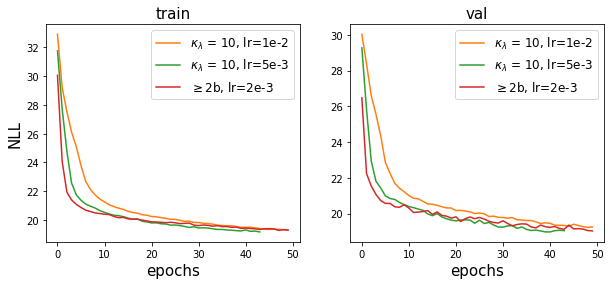

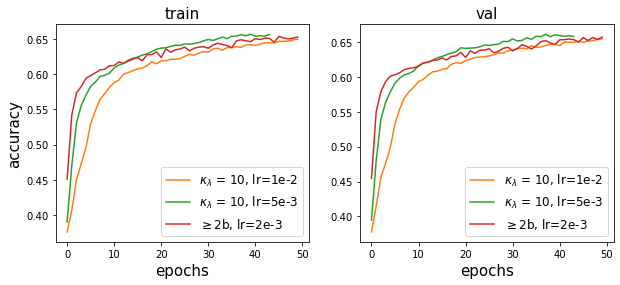

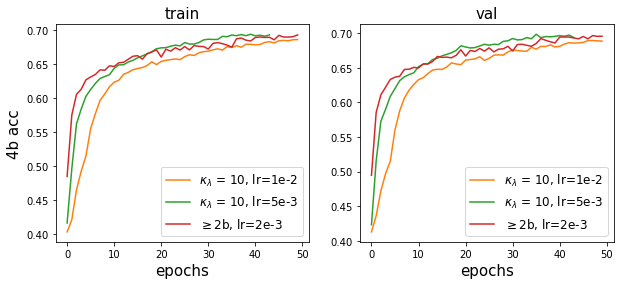

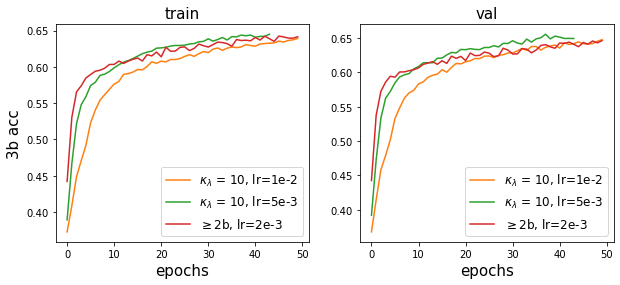

In [10]:
for metric, ylabel,f in zip(['loss','acc','acc_4b','acc_3b'],
                            ['NLL','accuracy','4b acc','3b acc'],[4,1,1,1]):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

#     ax1.plot(np.array(metrics1[f'train_{metric}']),label='SM, lr=5e-3',color='C0')
#     ax2.plot(f*np.array(metrics1[f'val_{metric}']),label='SM, lr=5e-3',color='C0')

    ax1.plot(np.array(metrics2[f'train_{metric}']),label='$\kappa_\lambda$ = 10, lr=1e-2',color='C1')
    ax2.plot(f*np.array(metrics2[f'val_{metric}']),label='$\kappa_\lambda$ = 10, lr=1e-2',color='C1')

    ax1.plot(np.array(metrics3[f'train_{metric}']),label='$\kappa_\lambda$ = 10, lr=5e-3',color='C2')
    ax2.plot(f*np.array(metrics3[f'val_{metric}']),label='$\kappa_\lambda$ = 10, lr=5e-3',color='C2')
    
    ax1.plot(np.array(metrics4[f'train_{metric}']),label='$\geq$2b, lr=2e-3',color='C3')
    ax2.plot(f*np.array(metrics4[f'val_{metric}']),label='$\geq$2b, lr=2e-3',color='C3')

    ax1.legend(fontsize=12)
    ax2.legend(fontsize=12)

    ax1.set_xlabel('epochs',fontsize=15)
    ax2.set_xlabel('epochs',fontsize=15)
    ax1.set_ylabel(ylabel,fontsize=15)

    ax1.set_title('train',fontsize=15)
    ax2.set_title('val',fontsize=15)
    fig.show()

**Evaluate the massplanes and $m_{hh}$ for the NLO FT samples**

In [11]:
reload = False

In [17]:
pconfig = 'NLO_FT'
filename_3b = f'../data/data16_PFlow-FEB20-5jets/df_{pconfig}_3b.h5'
filename_2b = f'../data/data16_PFlow-FEB20-5jets/df_{pconfig}_2b.h5'

if reload:
    
    # >= 3b
    dfs = []
    for f in tqdm(glob(f'../data/data16_PFlow-FEB20-5jets/files/df_period?_*_{pconfig}_3b.h5')):
        dfi = pd.read_hdf(f,key='df')
        dfs.append(dfi)

    dat_sm_3b = pd.concat(dfs)
    dat_sm_3b.to_hdf(filename_3b,key='df')
    
    # 2b
    dfs = []
    for f in tqdm(glob(f'../data/data16_PFlow-FEB20-5jets/files/df_period?_*_{pconfig}_2b.h5')):
        dfi = pd.read_hdf(f,key='df')
        dfs.append(dfi)

    dat_sm_2b = pd.concat(dfs)
    dat_sm_2b.to_hdf(filename_2b,key='df')
    
else:
    dat_sm_3b = pd.read_hdf(filename_3b,key='df')
    dat_sm_2b = pd.read_hdf(filename_2b,key='df')
    

In [18]:
pconfig = 'kappa_10'
filename_3b = f'../data/data16_PFlow-FEB20-5jets/df_{pconfig}_3b.h5'
filename_2b = f'../data/data16_PFlow-FEB20-5jets/df_{pconfig}_2b.h5'

if reload:
    
    # >= 3b
    dfs = []
    for f in tqdm(glob(f'../data/data16_PFlow-FEB20-5jets/files/df_period?_*_{pconfig}_3b.h5')):
        dfi = pd.read_hdf(f,key='df')
        dfs.append(dfi)

    dat_k10_3b = pd.concat(dfs)
    dat_k10_3b.to_hdf(filename_3b,key='df')
    
    # 2b
    dfs = []
    for f in tqdm(glob(f'../data/data16_PFlow-FEB20-5jets/files/df_period?_*_{pconfig}_2b.h5')):
        dfi = pd.read_hdf(f,key='df')
        dfs.append(dfi)

    dat_k10_2b = pd.concat(dfs)
    dat_k10_2b.to_hdf(filename_2b,key='df')
    
else:
    dat_k10_3b = pd.read_hdf(filename_3b,key='df')
    dat_k10_2b = pd.read_hdf(filename_2b,key='df')
    

MemoryError: Unable to allocate 12.6 GiB for an array with shape (30, 56437409) and data type float64

Also compare with the BDT pairing.

In [14]:
fDir = "../../hh4b/bTagOpt-hh4b-resolved-reconstruction" 
    
lumi16 = 24.5556
     
tagger = 'dl1r'
wp = 77

key = f"{tagger}_{wp}"
bdt = nanoToDf(f"{fDir}/bdt_{key}.root",ttree="sig")

# Doing the luminosity normalization here as well
bdt['mc_sf'] *= lumi16

sig


In [15]:
SeanDir = "../../public/hh4b/bTagOptStudies/SeansFiles"

key = f"{tagger}_{wp}"
rr = uproot.open(f"{SeanDir}/{tagger}/{wp}/data16_with_weights.root")

dfi = rr["fullmassplane"].pandas.df()
dfi['NN_d24_weight_16'] *= rr['NN_norm_16']._fVal
dfi['NN_d24_weight_CRderiv_16'] *= rr['NN_norm_CRderiv_16']._fVal

# For the background estimate, load in the 2b data
data_SR = dfi[(dfi.kinematic_region==0)&(dfi.ntag==2)]

In [ ]:
for df in [dat_sm_2b, dat_sm_3b, dat_k10_2b, dat_k10_3b,
           sm_smPair, sm_k10Pair,k10_smPair, k10_k10Pair]:
    df['abs_deta_hh'] = np.abs(df.eta_h1 - df.eta_h2)

In [ ]:
edges = np.array([150, 250, 262, 275, 288, 302, 317, 332, 348, 365, 383, 402, 422, 443, 465, 488, 512, 
                  537, 563, 591, 620, 651, 683, 717, 752, 789, 828, 869, 912, 957,1004, 1054, 1106, 1161, 
                  1219, 1279, 1342, 1409, 1479, 1552, 1629, 1710, 1795, 1884, 1978, 2076])

**Process the SM**

In [ ]:
modelDir3

**Question:** How does training on $\kappa_\lambda$ = 10 impact the SM efficiency?

In [ ]:
smDir = f'SMNR_mc16a_PFlow-{prodTag}-{nSelectedJets}jets'
k10Dir = f'k10_mc16a_PFlow-{prodTag}-{nSelectedJets}jets'

sm_smPair  = pd.read_hdf(f"../data/{smDir}/df_2b_scaledInputs.h5", key='df')
sm_k10Pair = pd.read_hdf(f"../data/{smDir}/df_2b_scaledInputs.h5", key='df')

k10_smPair  = pd.read_hdf(f"../data/{k10Dir}/df_2b_scaledInputs.h5", key='df')
k10_k10Pair = pd.read_hdf(f"../data/{k10Dir}/df_2b_scaledInputs.h5", key='df')

# model trained w/ SM sample
m_SM = pairAGraph(inpt_dim=5,embed_dim=embed_dim,ff_dim=ff_dim,
                  nAttnBlocks=1,nHeads=nHeads,p=dpt,njets=nSelectedJets)
m_SM.load_state_dict(torch.load(f'{modelDir1}/model.pt',map_location='cpu'))
m_SM.eval()

# model trained w/ kappa_lambda = 10
m_k10 = pairAGraph(inpt_dim=5,embed_dim=embed_dim,ff_dim=ff_dim,
                   nAttnBlocks=1,nHeads=nHeads,p=dpt,njets=nSelectedJets)
m_k10.load_state_dict(torch.load(f'{modelDir3}/model.pt',map_location='cpu'))
m_k10.eval()

# pairing
applyCuts(sm_smPair, m_SM,nSelectedJets)
applyCuts(sm_k10Pair,m_k10,nSelectedJets)

applyCuts(k10_smPair, m_SM,nSelectedJets)
applyCuts(k10_k10Pair,m_k10,nSelectedJets)

# Normalize mc sf
normalizeWeight(sm_smPair, smDir[:-6],lumi=lumi16)
normalizeWeight(sm_k10Pair,smDir[:-6],lumi=lumi16)


In [ ]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

# SM NLO training

#smask = (sdf.index%2==0)&
smask0 = (sm_smPair.ntag>=4)&(sm_smPair.trigger) & (sm_smPair.abs_deta_hh < 1.5) & (sm_smPair.X_wt > 1.5) & (sm_smPair.kinematic_region == 0)
s0,_,_ = ax1.hist(sm_smPair.loc[smask0,'m_hh'],edges,
                  label='pairAGraph train SM: eval SM',
                  weights=sm_smPair.loc[smask0,'mc_sf']*sm_smPair.loc[smask0,'max_prob'],
                  color='darkorchid',histtype='step',log=True)

N2b = np.sum((dat_sm_2b.kinematic_region==2) & (dat_sm_2b.abs_deta_hh < 1.5) & (dat_sm_2b.X_wt > 1.5))
N4b = np.sum((dat_sm_3b.ntag>=4) & (dat_sm_3b.kinematic_region==2) & (dat_sm_3b.abs_deta_hh < 1.5) & (dat_sm_3b.X_wt > 1.5))
N0 = N4b/N2b

SR_2b0 = (dat_sm_2b.kinematic_region==0) & (dat_sm_2b.abs_deta_hh < 1.5) & (dat_sm_2b.X_wt > 1.5)

b0,_,_ = ax1.hist(dat_sm_2b.loc[SR_2b0,'m_hh'],edges,
                  label='pairAGraph DL1r: 2b CR recaled',
                  weights=N0*dat_sm_2b.loc[SR_2b0,'max_prob'],log=True,
                  color='darkorchid',histtype='step',linestyle='--')

# kappa lambda training
smask1 = (sm_k10Pair.ntag>=4)&(sm_k10Pair.trigger) & (sm_k10Pair.abs_deta_hh < 1.5) & (sm_k10Pair.X_wt > 1.5) & (sm_k10Pair.kinematic_region == 0)
s1,_,_ = ax1.hist(sm_k10Pair.loc[smask1,'m_hh'],edges,
                  label='pairAGraph DL1r: SM',
                  weights=sm_k10Pair.loc[smask1,'mc_sf']*sm_k10Pair.loc[smask1,'max_prob'],
                  color='darkturquoise',histtype='step',log=True)

N2b = np.sum((dat_k10_2b.kinematic_region==2) & (dat_k10_2b.abs_deta_hh < 1.5) & (dat_k10_2b.X_wt > 1.5))
N4b = np.sum((dat_k10_3b.ntag>=4) & (dat_k10_3b.kinematic_region==2) & (dat_k10_3b.abs_deta_hh < 1.5) & (dat_k10_3b.X_wt > 1.5))
N1 = N4b/N2b

SR_2b1 = (dat_k10_2b.kinematic_region==0) & (dat_k10_2b.abs_deta_hh < 1.5) & (dat_k10_2b.X_wt > 1.5)

b1,_,_ = ax1.hist(dat_k10_2b.loc[SR_2b1,'m_hh'],edges,
                  label='pairAGraph DL1r: 2b CR recaled',
                  weights=N1*dat_k10_2b.loc[SR_2b1,'max_prob'],log=True,
                  color='darkturquoise',histtype='step',linestyle='--')

# BDT pairing
s3,_,_ = ax1.hist(bdt.loc[bdt.ntag>=4,'m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="BDT pair SM NR",
                  weights=bdt.loc[bdt.ntag>=4,'mc_sf'])
b3,_,_ = ax1.hist(data_SR[key]['m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="BDT pair rw 2b:",ls='--',
                  weights=data_SR[key]['NN_d24_weight_16'])

xx = 0.5*(edges[:-1]+edges[1:])
ax2.plot(xx, s0/np.sqrt(b0),marker='.',color='darkorchid',   linewidth=0)
ax2.plot(xx, s1/np.sqrt(b1),marker='.',color='darkturquoise',linewidth=0)
ax2.plot(xx, s3/np.sqrt(b3),marker='.',color='C2',           linewidth=0)
ax2.set_xlabel('$m_{hh}$',fontsize=16)
#ax2.set_ylim(0,.04)

_,ymax = ax1.get_ylim()
ax1.set_ylim(0,ymax)

ax1.set_ylabel('Entries',fontsize=16)
ax1.text(0,1,'pairAGraph weightdat_mdr by max_prob',ha='left',va='bottom',transform=ax1.transAxes)

sigText = '$\sqrt{\sum_i{s_i^2 / b_i}}$ = '

ax2.text(.975,1,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s0[b0!=0]**2 / b0[b0!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='darkorchid',fontsize=8)
ax2.text(.975,.675,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s1[b1!=0]**2 / b1[b1!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='darkturquoise',fontsize=8)
ax2.text(.975,.35,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s3[b3!=0]**2 / b3[b3!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='C2',fontsize=8)

ax2.set_ylabel('$s / \sqrt{b}$',fontsize=16)

ax1.legend(fontsize=12,bbox_to_anchor=(1,1.05))

ax1.set_title('signal region', loc='right',fontsize=14)

#plt.savefig(f'figures/{subDir}/m_hh_SR_log_ratio_cf_baseline_2bCRscaled.pdf',bbox_inches='tight')

plt.show()

- I found it really interesting that the signal efficiency for *low* $m_{hh}$ is so much lower for $\kappa_\lambda$ = 10 than the SM training.


Note - this could be because I was using the `max_prob` which is sensitive to *which* sample the training was on.

**Q:** Could this be because of my train / test training?

It seems that fixing the luminosity scaling is helping these numbers out a bit.

This is awesome - and I was wondering if maybe the jet energy regression is *changing* these numbers a little bit?

In [ ]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

# SM NLO training

#smask = (sdf.index%2==0)&
smask0 = (sm_smPair.ntag>=4)&(sm_smPair.trigger) & (sm_smPair.abs_deta_hh < 1.5) & (sm_smPair.X_wt > 1.5) & (sm_smPair.kinematic_region == 0)
s0,_,_ = ax1.hist(sm_smPair.loc[smask0,'m_hh'],edges,
                  label='pairAGraph train SM: eval SM',
                  weights=sm_smPair.loc[smask0,'mc_sf'],
                  color='darkorchid',histtype='step',log=True)

N2b = np.sum((dat_sm_2b.kinematic_region==2) & (dat_sm_2b.abs_deta_hh < 1.5) & (dat_sm_2b.X_wt > 1.5))
N4b = np.sum((dat_sm_3b.ntag>=4) & (dat_sm_3b.kinematic_region==2) & (dat_sm_3b.abs_deta_hh < 1.5) & (dat_sm_3b.X_wt > 1.5))
N0 = N4b/N2b

SR_2b0 = (dat_sm_2b.kinematic_region==0) & (dat_sm_2b.abs_deta_hh < 1.5) & (dat_sm_2b.X_wt > 1.5)

b0,_,_ = ax1.hist(dat_sm_2b.loc[SR_2b0,'m_hh'],edges,
                  label='pairAGraph DL1r: 2b CR recaled',
                  weights=N0*np.ones(np.sum(SR_2b0)),log=True,
                  color='darkorchid',histtype='step',linestyle='--')

# kappa lambda training
smask1 = (sm_k10Pair.ntag>=4)&(sm_k10Pair.trigger) & (sm_k10Pair.abs_deta_hh < 1.5) & (sm_k10Pair.X_wt > 1.5) & (sm_k10Pair.kinematic_region == 0)
s1,_,_ = ax1.hist(sm_k10Pair.loc[smask1,'m_hh'],edges,
                  label='pairAGraph DL1r: SM',
                  weights=sm_k10Pair.loc[smask1,'mc_sf'],
                  color='darkturquoise',histtype='step',log=True)

N2b = np.sum((dat_k10_2b.kinematic_region==2) & (dat_k10_2b.abs_deta_hh < 1.5) & (dat_k10_2b.X_wt > 1.5))
N4b = np.sum((dat_k10_3b.ntag>=4) & (dat_k10_3b.kinematic_region==2) & (dat_k10_3b.abs_deta_hh < 1.5) & (dat_k10_3b.X_wt > 1.5))
N1 = N4b/N2b

SR_2b1 = (dat_k10_2b.kinematic_region==0) & (dat_k10_2b.abs_deta_hh < 1.5) & (dat_k10_2b.X_wt > 1.5)

b1,_,_ = ax1.hist(dat_k10_2b.loc[SR_2b1,'m_hh'],edges,
                  label='pairAGraph DL1r: 2b CR recaled',
                  weights=N1*np.ones(np.sum(SR_2b1)),log=True,
                  color='darkturquoise',histtype='step',linestyle='--')

# BDT pairing
s3,_,_ = ax1.hist(bdt.loc[bdt.ntag>=4,'m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="BDT pair SM NR",
                  weights=bdt.loc[bdt.ntag>=4,'mc_sf'])
b3,_,_ = ax1.hist(data_SR[key]['m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="BDT pair rw 2b:",ls='--',
                  weights=data_SR[key]['NN_d24_weight_16'])

xx = 0.5*(edges[:-1]+edges[1:])
ax2.plot(xx, s0/np.sqrt(b0),marker='.',color='darkorchid',   linewidth=0)
ax2.plot(xx, s1/np.sqrt(b1),marker='.',color='darkturquoise',linewidth=0)
ax2.plot(xx, s3/np.sqrt(b3),marker='.',color='C2',           linewidth=0)
ax2.set_xlabel('$m_{hh}$',fontsize=16)
#ax2.set_ylim(0,.04)

_,ymax = ax1.get_ylim()
ax1.set_ylim(0,ymax)

ax1.set_ylabel('Entries',fontsize=16)
ax1.text(0,1,'pairAGraph w/o weights',ha='left',va='bottom',transform=ax1.transAxes)

sigText = '$\sqrt{\sum_i{s_i^2 / b_i}}$ = '

ax2.text(.975,1,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s0[b0!=0]**2 / b0[b0!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='darkorchid',fontsize=8)
ax2.text(.975,.675,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s1[b1!=0]**2 / b1[b1!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='darkturquoise',fontsize=8)
ax2.text(.975,.35,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s3[b3!=0]**2 / b3[b3!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='C2',fontsize=8)

ax2.set_ylabel('$s / \sqrt{b}$',fontsize=16)

ax1.legend(fontsize=12,bbox_to_anchor=(1,1.05))

ax1.set_title('signal region', loc='right',fontsize=14)

#plt.savefig(f'figures/{subDir}/m_hh_SR_log_ratio_cf_baseline_2bCRscaled.pdf',bbox_inches='tight')

plt.show()

**Q:** What do these event weights on the new samples look like?

In [ ]:
smMNT_text = "$\mathbf{ATLAS}$ Simulation Internal\n"
smMNT_text += "SMNR APR2020 MNT prod\n"
smMNT_text += "NLO with finite top calculation"

k10MNT_text = "$\mathbf{ATLAS}$ Simulation Internal\n"
k10MNT_text += "$\kappa_\lambda = 10$ APR2020 MNT prod\n"
k10MNT_text += "NLO with finite top calculation"

In [ ]:
n,e1,_ = plt.hist(sm_smPair['mc_sf'],  100, #log=True,
                 color='darkorchid',histtype='step')
plt.xlabel('mc_sf',fontsize=15)
plt.ylabel('Entries',fontsize=15)

ax = plt.gca()
plt.text(0,1, smMNT_text, ha='left',va='bottom', transform=ax.transAxes)

plt.show()

In [ ]:
n,e2,_ = plt.hist(k10_k10Pair['mc_sf'],  100, log=True,
                 color='darkturquoise',histtype='step')
plt.xlabel('mc_sf',fontsize=15)
plt.ylabel('Entries',fontsize=15)

ax = plt.gca()
plt.text(0,1, k10MNT_text, ha='left',va='bottom', transform=ax.transAxes)

plt.show()

Look at the 2d plot w/r.t $m_{hh}$.

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
plt.hist2d(sm_smPair['m_hh'], sm_smPair['mc_sf'], 100,[[0,1500],e1[[0,-1]]],
           norm=LogNorm())

plt.xlabel('m_hh',fontsize=15)
plt.ylabel('mc_sf',fontsize=15)
plt.colorbar()

ax = plt.gca()
plt.text(0,1, smMNT_text, ha='left',va='bottom', transform=ax.transAxes)

plt.show()

In [ ]:
plt.hist2d(k10_k10Pair['m_hh'], k10_k10Pair['mc_sf'], 100,[[0,1500],e2[[0,-1]]],
           cmap='terrain',norm=LogNorm())

plt.xlabel('m_hh',fontsize=15)
plt.ylabel('mc_sf',fontsize=15)
plt.colorbar()

ax = plt.gca()
plt.text(0,1, k10MNT_text, ha='left',va='bottom', transform=ax.transAxes)

plt.show()

**Hypo:** Could the higher $m_{HH}$ be due to the jet energy correction?

In [ ]:
fDir = "../../hh4b/hh4b-resolved-reconstruction" 
         
sm_mdr = nanoToDf(f"{fDir}/sm_pT20.root",ttree="sig")

# Doing the luminosity normalization here as well
sm_mdr['mc_sf'] *= lumi16

dat_mdr = nanoToDf(f"{fDir}/dat16_pT20.root",ttree="fullmassplane")

In [ ]:
jpT_cols = ['pT_h1_j1', 'pT_h1_j2', 'pT_h2_j1', 'pT_h2_j2']

for df in [sm_mdr , dat_mdr]:
    
    df['pT_category'] = -1
    min_pTs = np.min( df[jpT_cols], axis=1 )
    
    masks = [(min_pTs > 40),
             (min_pTs > 30) & (min_pTs < 40),
             (min_pTs > 20) & (min_pTs < 30)]
    
    for k, m in enumerate(masks):
        df.loc[m,'pT_category'] = k
            

In [ ]:
# Derive the new variables that Sean suggested
dat_mdr['dPhi_h1'] = np.arccos(np.cos(dat_mdr.phi_h1_j1 - dat_mdr.phi_h1_j2))
dat_mdr['dPhi_h2'] = np.arccos(np.cos(dat_mdr.phi_h2_j1 - dat_mdr.phi_h2_j2))

dat_mdr['dPhi_hh'] = np.arccos(np.cos(dat_mdr.phi_h1 - dat_mdr.phi_h2))
dat_mdr['dR_hh'] = np.sqrt( dat_mdr['dPhi_hh']**2 + (dat_mdr.eta_h1 - dat_mdr.eta_h2)**2 )

In [ ]:
sort_rw_cols=['pT_4_log', 'pT_2_log','eta_i', 'dRjj_1_log', 'dRjj_2_log', 
              'njets', 'pt_hh_log', 'X_wt_log', 'dR_hh', 'dPhi_h1', 'dPhi_h2']

pTs = [40,30,20]

In [ ]:
os.sys.path.append('../eda_tools')
from NN_RW import getNNweights

In [ ]:
# Lowering pT w/ hp scan over hidden units
min_val_loss = {}

for k, pT in enumerate(pTs):
    
    # Add a new key to the dictionary
    key = f'pT_{pT}'
    min_val_loss[key] = []
    
    for nHidden in [50]: 
        
        modelName = f"../bTagOptStudies/models/data16_mdr_dl1r_77/MAR20_dPhi_HCs_pT_{pT}_nHidden_{nHidden}.h5"
            
        mask = (dat_mdr.pT_category == k)
            
        getNNweights(dat_mdr, mask=mask, kinematic_region=2,
                     sort_rw_cols=sort_rw_cols, nHidden=nHidden,
                     epochs = 80, patience=10, train=False, 
                     key=f"w_2b_pT_{pT}_nHidden_{nHidden}", 
                     modelName=modelName)
        
        # Load the min val loss
        historyName = modelName[:-3]+"_history.h5"
            
        h = h5py.File(historyName,"r")

        vl = np.min(h['val_loss'][:])
        min_val_loss[key].append(vl)

        h.close()
        

In [ ]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

# SM NLO training

smask0 = (sm_smPair.ntag>=4)&(sm_smPair.trigger) & (sm_smPair.abs_deta_hh < 1.5) & (sm_smPair.X_wt > 1.5) & (sm_smPair.kinematic_region == 0)
s0,_,_ = ax1.hist(sm_smPair.loc[smask0,'m_hh'],edges,
                  label='pairAGraph train SM: eval SM',
                  weights=sm_smPair.loc[smask0,'mc_sf']*sm_smPair.loc[smask0,'max_prob'],
                  color='darkorchid',histtype='step',log=True)

N2b = np.sum((dat_sm_2b.kinematic_region==2) & (dat_sm_2b.abs_deta_hh < 1.5) & (dat_sm_2b.X_wt > 1.5))
N4b = np.sum((dat_sm_3b.ntag>=4) & (dat_sm_3b.kinematic_region==2) & (dat_sm_3b.abs_deta_hh < 1.5) & (dat_sm_3b.X_wt > 1.5))
N0 = N4b/N2b

SR_2b0 = (dat_sm_2b.kinematic_region==0) & (dat_sm_2b.abs_deta_hh < 1.5) & (dat_sm_2b.X_wt > 1.5)

b0,_,_ = ax1.hist(dat_sm_2b.loc[SR_2b0,'m_hh'],edges,
                  label='pairAGraph DL1r: 2b CR recaled',
                  weights=N0*dat_sm_2b.loc[SR_2b0,'max_prob'],log=True,
                  color='darkorchid',histtype='step',linestyle='--')

# kappa lambda training
smask1 = (sm_k10Pair.ntag>=4)&(sm_k10Pair.trigger) & (sm_k10Pair.abs_deta_hh < 1.5) & (sm_k10Pair.X_wt > 1.5) & (sm_k10Pair.kinematic_region == 0)
s1,_,_ = ax1.hist(sm_k10Pair.loc[smask1,'m_hh'],edges,
                  label='pairAGraph DL1r: SM',
                  weights=sm_k10Pair.loc[smask1,'mc_sf']*sm_k10Pair.loc[smask1,'max_prob'],
                  color='darkturquoise',histtype='step',log=True)

N2b = np.sum((dat_k10_2b.kinematic_region==2) & (dat_k10_2b.abs_deta_hh < 1.5) & (dat_k10_2b.X_wt > 1.5))
N4b = np.sum((dat_k10_3b.ntag>=4) & (dat_k10_3b.kinematic_region==2) & (dat_k10_3b.abs_deta_hh < 1.5) & (dat_k10_3b.X_wt > 1.5))
N1 = N4b/N2b

SR_2b1 = (dat_k10_2b.kinematic_region==0) & (dat_k10_2b.abs_deta_hh < 1.5) & (dat_k10_2b.X_wt > 1.5)

b1,_,_ = ax1.hist(dat_k10_2b.loc[SR_2b1,'m_hh'],edges,
                  label='pairAGraph DL1r: 2b CR recaled',
                  weights=N1*dat_k10_2b.loc[SR_2b1,'max_prob'],log=True,
                  color='darkturquoise',histtype='step',linestyle='--')

# BDT pairing
s3,_,_ = ax1.hist(bdt.loc[bdt.ntag>=4,'m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="BDT pair SM NR",
                  weights=bdt.loc[bdt.ntag>=4,'mc_sf'])
b3,_,_ = ax1.hist(data_SR['m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="BDT pair rw 2b:",ls='--',
                  weights=data_SR['NN_d24_weight_16'])

# MDR + min(Dhh)
smask4 = (sm_mdr.ntag>=4) & (sm_mdr.pT_category == 0)
s4,_,_ = ax1.hist(sm_mdr.loc[smask4,'m_hh'],
                  edges,color='orange',histtype='step',log=True,
                  label="SM NR: MDR w/ jet energy correction",ls='-',
                  weights=sm_mdr.loc[smask4,'mc_sf'])

bmask4 = (dat_mdr.ntag==2) & (dat_mdr.kinematic_region==0) & (dat_mdr.pT_category==0)
b4,_,_ = ax1.hist(dat_mdr.loc[bmask4,'m_hh'],
                  edges,color='orange',histtype='step',log=True,
                  label="2b bkg:  MDR w/ jet energy correction",ls='--',
                  weights=dat_mdr.loc[bmask4,f'w_2b_pT_40_nHidden_50'])


xx = 0.5*(edges[:-1]+edges[1:])
ax2.plot(xx, s0/np.sqrt(b0),marker='.',color='darkorchid',   linewidth=0)
ax2.plot(xx, s1/np.sqrt(b1),marker='.',color='darkturquoise',linewidth=0)
ax2.plot(xx, s3/np.sqrt(b3),marker='.',color='C2',           linewidth=0)
ax2.plot(xx, s4/np.sqrt(b4),marker='.',color='orange',           linewidth=0)
ax2.set_xlabel('$m_{hh}$',fontsize=16)
#ax2.set_ylim(0,.04)

_,ymax = ax1.get_ylim()
ax1.set_ylim(0,ymax)

ax1.set_ylabel('Entries',fontsize=16)
ax1.text(0,1,'pairAGraph weight by max_prob',ha='left',va='bottom',transform=ax1.transAxes)

sigText = '$\sqrt{\sum_i{s_i^2 / b_i}}$ = '

ax2.text(.975,1,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s0[b0!=0]**2 / b0[b0!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='darkorchid',fontsize=8)
ax2.text(.975,.7,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s1[b1!=0]**2 / b1[b1!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='darkturquoise',fontsize=8)
ax2.text(.975,.4,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s3[b3!=0]**2 / b3[b3!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='C2',fontsize=8)
ax2.text(.975,.1,
         sigText+'{:.3f}'.format(np.sqrt(np.sum(s4[b4!=0]**2 / b4[b4!=0]))),
         ha='right',va='top',transform=ax2.transAxes,color='orange',fontsize=8)

ax2.set_ylabel('$s / \sqrt{b}$',fontsize=16)

ax1.legend(fontsize=12,bbox_to_anchor=(1,1.05))

ax1.set_title('signal region', loc='right',fontsize=14)

#plt.savefig(f'figures/{subDir}/m_hh_SR_log_ratio_cf_baseline_2bCRscaled.pdf',bbox_inches='tight')

plt.show()

In [ ]:
data_SR

In [ ]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

# BDT pairing
b3a,_,_ = ax1.hist(data_SR['m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="2b BDT $\mu$-in-jet",ls='-',density=True)

b3b,_,_ = ax1.hist(data_SR['m_hh'],
                  edges,color='C2',histtype='step',log=True,
                  label="rw 2b old BDT $\mu$-in-jet",ls='--',
                  weights=data_SR['NN_d24_weight_16'],density=True)

# MDR + min(Dhh)
bmask4 = (dat_mdr.ntag==2) & (dat_mdr.kinematic_region==0) & (dat_mdr.pT_category==0)
b4a,_,_ = ax1.hist(dat_mdr.loc[bmask4,'m_hh'],
                  edges,color='orange',histtype='step',log=True,
                  label="2b:  MDR w/ pTReco",ls='-',density=True)

b4b,_,_ = ax1.hist(dat_mdr.loc[bmask4,'m_hh'],
                  edges,color='orange',histtype='step',log=True,
                  label="rw 2b:  MDR w/ pTReco",ls='--',
                  weights=dat_mdr.loc[bmask4,f'w_2b_pT_40_nHidden_50'],density=True)


ax2.plot(xx,b3b/b3a,'C2')
ax2.plot(xx,b4b/b4a,'orange')
ax2.plot(xx, np.ones_like(xx),'k--')

ax1.set_ylabel('Normalized Entries',fontsize=16)
ax1.text(0,1,'Comparing mhh shapes',ha='left',va='bottom',transform=ax1.transAxes)
ax1.legend(fontsize=10)#,bbox_to_anchor=(1,1.05))
ax1.set_title('signal region', loc='right',fontsize=14)
ax2.set_ylabel('rw 2b / 2b')
ax2.set_xlabel('$m_{hh}$',fontsize=16)

#plt.savefig(f'figures/{subDir}/m_hh_SR_log_ratio_cf_baseline_2bCRscaled.pdf',bbox_inches='tight')
plt.show()

Conclusion - Maybe I just need to run the reweighting for pairAGraph?

In [ ]:
rr['NN_norm_16']._fVal

In [ ]:
from plot_helper import massplane

In [ ]:
kwargs = {'figsize': (10, 8),
           'bins' : (125, 125),
           'xrange': (25, 200),
           'yrange': (25, 200),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': '2b pairAGraph, train SM: $|\Delta \eta_{hh}| < 1.5$',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           #'filename': f'{figDir}/massplane_4jetsGNN_2b.pdf',
           'alpha': 0.7,
           'save': False,
           'show': True
          }

mask = np.abs(dat_sm_2b.eta_h1-dat_sm_2b.eta_h2) < 1.5
fig = massplane(dat_sm_2b.loc[mask,'m_h1'],
                dat_sm_2b.loc[mask,'m_h2'],**kwargs)

In [ ]:
kwargs['title'] = '2b pairAGraph, train $\kappa_\lambda$ = 10: $|\Delta \eta_{hh}| < 1.5$'

mask = np.abs(dat_k10_2b.eta_h1-dat_k10_2b.eta_h2) < 1.5
fig = massplane(dat_k10_2b.loc[mask,'m_h1'],
                dat_k10_2b.loc[mask,'m_h2'],**kwargs)

Ok - this is perfect, and *exactly* what I was expecting.

In [ ]:
kwargs['title'] = '4b pairAGraph, train SM: $|\Delta \eta_{hh}| < 1.5$'

mask = (np.abs(dat_sm_3b.eta_h1-dat_sm_3b.eta_h2) < 1.5) & (dat_sm_3b.ntag >= 4) & (dat_sm_3b.kinematic_region != 0)
fig = massplane(dat_sm_3b.loc[mask,'m_h1'],
                dat_sm_3b.loc[mask,'m_h2'],**kwargs)

In [ ]:
kwargs['title'] = '4b pairAGraph, train $\kappa_\lambda$ = 10: $|\Delta \eta_{hh}| < 1.5$'

mask = (np.abs(dat_k10_3b.eta_h1-dat_k10_3b.eta_h2) < 1.5) & (dat_k10_3b.ntag >= 4) & (dat_k10_3b.kinematic_region != 0)
fig = massplane(dat_k10_3b.loc[mask,'m_h1'],
                dat_k10_3b.loc[mask,'m_h2'],**kwargs)